In [1]:
pip install -U scikit-learn


     ---------------------------------------- 8.3/8.3 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [17]:
pip install tensorflow

In [18]:
data = pd.read_csv('tata.csv') 

In [19]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-24,504.700012,506.049988,493.600006,498.350006,498.350006,5189459.0
1,2016-08-25,498.350006,503.299988,491.299988,493.850006,493.850006,8787262.0
2,2016-08-26,502.000000,515.349976,486.000000,503.750000,503.750000,16347856.0
3,2016-08-29,522.500000,528.750000,515.400024,525.299988,525.299988,12534399.0
4,2016-08-30,528.500000,530.799988,524.099976,529.000000,529.000000,6611147.0


In [20]:
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

In [21]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [22]:
def create_lstm_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i + time_steps, 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

In [23]:
time_steps = 60 

In [24]:
X_train, y_train = create_lstm_dataset(train_data, time_steps)
X_test, y_test = create_lstm_dataset(test_data, time_steps)

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 14s 107ms/step - loss: nan
Epoch 2/10
29/29 [==============================] - 3s 105ms/step - loss: nan
Epoch 3/10
29/29 [==============================] - 3s 107ms/step - loss: nan
Epoch 4/10
29/29 [==============================] - 3s 106ms/step - loss: nan
Epoch 5/10
29/29 [==============================] - 3s 106ms/step - loss: nan
Epoch 6/10
29/29 [==============================] - 3s 107ms/step - loss: nan
Epoch 7/10
29/29 [==============================] - 3s 105ms/step - loss: nan
Epoch 8/10
29/29 [==============================] - 3s 104ms/step - loss: nan
Epoch 9/10
29/29 [==============================] - 3s 106ms/step - loss: nan
Epoch 10/10
29/29 [==============================] - 3s 106ms/step - loss: nan


In [29]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

6/6 [==============================] - 0s 39ms/step


In [30]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

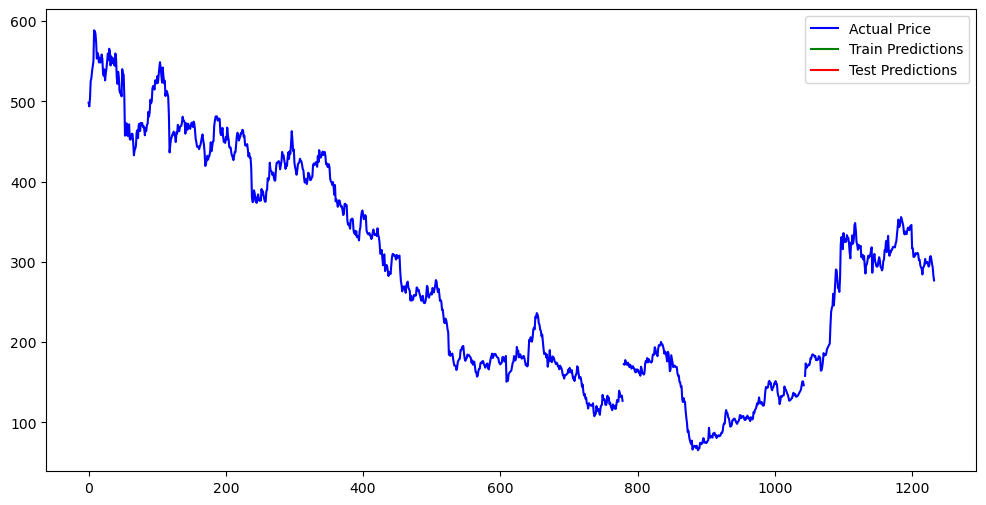

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices, color='blue', label='Actual Price')
plt.plot([None]*train_size + [x[0] for x in train_predictions], color='green', label='Train Predictions')
plt.plot([None]*len(train_predictions) + [x[0] for x in test_predictions], color='red', label='Test Predictions')
plt.legend()
plt.show()